In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import os
from sklearn.preprocessing import LabelEncoder


In [125]:
data1 = pd.read_csv("RentPrediction-Dataset.csv")
data1.drop(columns=data1.columns[0],axis=1,inplace=True)
data1

,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,1 - 3,1 - 2.5,"630 - 1,404",4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,1,"1,621 - 2,420"
1,denton,Eighteen 51 Brinker,1 - 3,1 - 2,"700 - 1,350",4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,0,1,1,0,1,1,"1,499 - 2,499"
2,denton,Epic Apartments,1 - 3,1 - 2,"633 - 1,180",3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1,"1,275 - 1,735"
3,denton,Epoch on Eagle,Studio - 2,1 - 2,"507 - 1,177",4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,0,1,1,1,0,1,"1,350 - 2,479"
4,denton,Allora Denton,1 - 2,1 - 2,"850 - 1,317",?,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,0,1,0,1,"1,380 - 2,020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,dallas,Muse,Studio - 3,1 - 2,"247 - 1,374",3.7,"3035 W Pentagon Pky,\r\n Dallas...",1,1,1,0,0,0,0,0,0,"763 - 2,296"
968,dallas,The Glen at Highpoint,1 - 2,1 - 2,"600 - 1,094",3.3,"9050 Markville Dr,\r\n Dallas,\...",0,1,1,0,0,0,1,0,0,"835 - 1,527"
969,dallas,Enclave At Prestonwood,1 - 2,1 - 2,480 - 944,4.0,"5930 Arapaho Rd,\r\n Dallas,\r\...",1,1,1,0,0,1,1,0,0,"925 - 1,937"
970,dallas,Oakwood Place Apartment Homes,1 - 3,1,"625 - 1,000",3.9,"4950 Wadsworth Dr,\r\n Dallas,\...",1,0,0,0,0,0,0,0,0,790 - 999


In [126]:
data2 = pd.read_csv("RentPrediction-Dataset2.csv")
data2.drop(columns=data2.columns[0],axis=1,inplace=True)
data2

,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,denton,Eighteen 51 Brinker,1-3,?,"700-1,350",3.2857142857142856,"1851 Brinker Rd, Denton, TX 76208",1,1,1,?,1,1,1,1,1,"1,449-2,499"
1,denton,Elan Denton,1-3,?,"630-1,404",3.142857142857143,"1501 Northstar Rd, Denton, TX 76208",1,1,1,?,1,1,0,1,1,"1,534-2,420"
2,denton,Epic Apartments,1-3,?,"633-1,180",3.5714285714285716,"3200 S Interstate 35 E, Denton, TX 76210",0,1,1,?,1,1,0,1,1,"1,240-1,350"
3,denton,Epoch on Eagle,Studio-2,?,"507-1,177",3.4285714285714284,"903 Avenue C, Denton, TX 76201",1,1,1,?,1,1,0,0,1,"1,350-2,479"
4,denton,32hundred Windsor,1-2,?,"812-1,185",3.0,"3200 W Windsor Dr, Denton, TX 76207",0,1,1,?,0,1,0,0,1,"1,395-2,970"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,dallas,Camino Del Sol Apartment Homes,1-2,?,565-981,3.2,"1030 Dallas Dr, Denton, TX 76205",0,1,1,?,0,1,1,0,0,"1,040-1,907"
2048,dallas,Preserve at Pecan Creek,1-3,?,"738-1,319",3.0,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,?,0,1,1,0,0,"1,209-2,149"
2049,dallas,Pecan Creek on McKinney Apartments,2-4,?,"950-1,300",3.1666666666666665,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,?,0,1,1,0,1,"1,283-1,473"
2050,dallas,Greenway Patio,1-3,?,"711-1,260",3.1666666666666665,"2912 Augusta Dr, Denton, TX 76207",1,1,0,?,1,1,1,0,0,"1,695-1,780"


In [127]:
data3 = data1.append(data2, ignore_index=True)
data3.head()

C:\Users\dy0119\AppData\Local\Temp\ipykernel_408\2625124568.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data1.append(data2, ignore_index=True)


,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,1 - 3,1 - 2.5,"630 - 1,404",4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,1,"1,621 - 2,420"
1,denton,Eighteen 51 Brinker,1 - 3,1 - 2,"700 - 1,350",4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,0,1,1,0,1,1,"1,499 - 2,499"
2,denton,Epic Apartments,1 - 3,1 - 2,"633 - 1,180",3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1,"1,275 - 1,735"
3,denton,Epoch on Eagle,Studio - 2,1 - 2,"507 - 1,177",4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,0,1,1,1,0,1,"1,350 - 2,479"
4,denton,Allora Denton,1 - 2,1 - 2,"850 - 1,317",?,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,0,1,0,1,"1,380 - 2,020"


In [128]:
# check for constant features
few_values = [
    val for val in data3.columns if len(data3[val].fillna(0).unique()) == 1
]

few_values

[]

In [129]:
# check for quasi constant features 
for val in data3.columns.sort_values():
    if (len(data3[val].unique()) < 3):
        print(pd.DataFrame(data3[val].value_counts()))

        City
dallas  2542
denton   482


In [130]:
# check for duplicate rows
data3[data3.duplicated(keep=False)]

,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
112,denton,4600 Hammerstein Blvd,4,2,"2,375",?,"4600 Hammerstein Blvd,\r\n Dent...",0,0,0,0,0,0,0,0,0,"3,295"
197,denton,4600 Hammerstein Blvd,4,2,"2,375",?,"4600 Hammerstein Blvd,\r\n Dent...",0,0,0,0,0,0,0,0,0,"3,295"
198,denton,6709 Roaring Creek,3,2,"2,161",?,"6709 Roaring Creek,\r\n Bartonv...",0,0,0,0,0,1,0,0,0,"2,645"
220,denton,6709 Roaring Creek,3,2,"2,161",?,"6709 Roaring Creek,\r\n Bartonv...",0,0,0,0,0,1,0,0,0,"2,645"
972,denton,Eighteen 51 Brinker,1-3,?,"700-1,350",3.2857142857142856,"1851 Brinker Rd, Denton, TX 76208",1,1,1,?,1,1,1,1,1,"1,449-2,499"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,dallas,Oaks 5th Street Crossing at City Station,Studio-2,?,"583-1,155",3.0,"351 N 5th St, Garland, TX 75040",1,1,1,?,0,1,1,0,0,"1,168-2,194"
2906,dallas,The Mark at Midlothian,1-2,?,"751-1,052",3.4285714285714284,"999 Walter Stephenson Rd, Midlothian, TX 76065",1,1,1,?,1,1,1,1,1,"1,473-2,020"
2956,dallas,The Mark at Midlothian,1-2,?,"751-1,052",3.4285714285714284,"999 Walter Stephenson Rd, Midlothian, TX 76065",1,1,1,?,1,1,1,1,1,"1,473-2,020"
2957,dallas,Axis 110,Studio-2,?,"511-1,437",3.2,"110 W Cityline Dr, Richardson, TX 75082",0,0,1,?,1,1,0,1,0,"1,289-2,686"


In [131]:
final_data = data3.drop_duplicates(keep='last')
final_data

,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,1 - 3,1 - 2.5,"630 - 1,404",4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,1,"1,621 - 2,420"
1,denton,Eighteen 51 Brinker,1 - 3,1 - 2,"700 - 1,350",4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,0,1,1,0,1,1,"1,499 - 2,499"
2,denton,Epic Apartments,1 - 3,1 - 2,"633 - 1,180",3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1,"1,275 - 1,735"
3,denton,Epoch on Eagle,Studio - 2,1 - 2,"507 - 1,177",4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,0,1,1,1,0,1,"1,350 - 2,479"
4,denton,Allora Denton,1 - 2,1 - 2,"850 - 1,317",?,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,0,1,0,1,"1,380 - 2,020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,dallas,Camino Del Sol Apartment Homes,1-2,?,565-981,3.2,"1030 Dallas Dr, Denton, TX 76205",0,1,1,?,0,1,1,0,0,"1,040-1,907"
3020,dallas,Preserve at Pecan Creek,1-3,?,"738-1,319",3.0,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,?,0,1,1,0,0,"1,209-2,149"
3021,dallas,Pecan Creek on McKinney Apartments,2-4,?,"950-1,300",3.1666666666666665,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,?,0,1,1,0,1,"1,283-1,473"
3022,dallas,Greenway Patio,1-3,?,"711-1,260",3.1666666666666665,"2912 Augusta Dr, Denton, TX 76207",1,1,0,?,1,1,1,0,0,"1,695-1,780"


In [132]:
#check if still duplicate rows are present and found none 
final_data[final_data.duplicated(keep=False)]

,City,Names,Bed,Bath,Area,Rating,location,petsallowed,pool,fitnessCenter,gated,grill,closet,washerdryer,countertops,access,Rent


In [133]:
# check for duplicate columns
duplicate_variables = []
for i in range(0, len(final_data.columns)):
    orig = final_data.columns[i]

    for dupe in final_data.columns[i + 1:]:
        if final_data[orig].equals(final_data[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')
            
duplicate_variables

[]

In [134]:
final_data = final_data.replace('?', np.nan)
final_data = final_data.replace('nan', np.nan)
final_data = final_data.replace('Call for Rent', np.nan)
final_data = final_data.replace('Contact for Rates', np.nan)

In [135]:
# check for nulls
final_data.isnull().sum()

City                0
Names               0
Bed               169
Bath             1994
Area              175
Rating            449
location            0
petsallowed       375
pool              176
fitnessCenter     176
gated            2076
grill             176
closet            176
washerdryer       176
countertops       176
access            176
Rent              205
dtype: int64

we need to drop gated feature as there are more missing values bb

In [136]:
final_data.drop(['Bath','gated'], axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963 entries, 0 to 3023
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City           2963 non-null   object
 1   Names          2963 non-null   object
 2   Bed            2794 non-null   object
 3   Area           2788 non-null   object
 4   Rating         2514 non-null   object
 5   location       2963 non-null   object
 6   petsallowed    2588 non-null   object
 7   pool           2787 non-null   object
 8   fitnessCenter  2787 non-null   object
 9   grill          2787 non-null   object
 10  closet         2787 non-null   object
 11  washerdryer    2787 non-null   object
 12  countertops    2787 non-null   object
 13  access         2787 non-null   object
 14  Rent           2758 non-null   object
dtypes: object(15)
memory usage: 370.4+ KB


In [137]:
# replace missing values with a function
cols=["Bed","Area","Rent"]
for a in cols:
    print(a)
    final_data[a] = final_data[a].apply(lambda x: str(x).replace('-',"")if 'Studio'in str(x) else x)
    final_data[a] = final_data[a].apply(lambda x: str(x).replace(" ","")if 'Studio'in str(x) else x)
    final_data[a] = final_data[a].apply(lambda x: str(x).split("-"))
    final_data[a] = final_data[a].apply(lambda x: x[1].strip(" ") if len(x)==2 else x[0])
    


Bed
Area
Rent


In [138]:
for col in final_data:
    print(col,list(final_data[col].unique()))

City ['denton', 'dallas']
Names ['Elan Denton', 'Eighteen 51 Brinker', 'Epic Apartments', 'Epoch on Eagle', 'Allora Denton', 'Discovery Park Apartments', 'Sunstone Village a 55+ Active Adult Cottages', '32hundred Windsor', 'Majestic Parc Apartments', 'Timberlinks At Denton', 'The Venue', 'Pecan Grove Apartments', 'Urban Square', 'Hickory Creek Ranch', 'The Residences at Rayzor Ranch', 'Fountains of Denton', 'The Vista at Rayzor Ranch', 'Eureka Village - Free Internet & Cable', 'Beall Way', 'Gardens of Denton', 'Oak Meadows Apartments', 'UC Denton Student Housing', 'Cooper Denton', 'Village at Rayzor Ranch', 'The Village Residences', 'The Mark At Denton', 'Woodlands of Denton', 'Lana Apartments', 'East End Lofts at the Railyard', 'Longhorn Cove Townhomes', 'The Lodge at Pecan Creek', 'Greenway Patio', 'Paces Crossing', 'Quincy Court', 'Sequoia Park Apartments', 'Camino Del Sol Apartment Homes', 'WatersEdge Denton Apartments', 'Square9 Apartment Homes', 'Canopy at South Lakes', 'The Pear

In [139]:
final = final_data.replace({'Bed':{'Studio1':1,'Studio2':2, 'Studio3':3,'Studio':1,'Studio4':4, 'nan': 2}})
final

,City,Names,Bed,Area,Rating,location,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,3,"1,404",4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,"2,420"
1,denton,Eighteen 51 Brinker,3,"1,350",4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,1,1,0,1,1,"2,499"
2,denton,Epic Apartments,3,"1,180",3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,"1,735"
3,denton,Epoch on Eagle,2,"1,177",4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,1,1,1,0,1,"2,479"
4,denton,Allora Denton,2,"1,317",NaN,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,1,0,1,"2,020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,dallas,Camino Del Sol Apartment Homes,2,981,3.2,"1030 Dallas Dr, Denton, TX 76205",0,1,1,0,1,1,0,0,"1,907"
3020,dallas,Preserve at Pecan Creek,3,"1,319",3.0,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,0,1,1,0,0,"2,149"
3021,dallas,Pecan Creek on McKinney Apartments,4,"1,300",3.1666666666666665,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,0,1,1,0,1,"1,473"
3022,dallas,Greenway Patio,3,"1,260",3.1666666666666665,"2912 Augusta Dr, Denton, TX 76207",1,1,0,1,1,1,0,0,"1,780"


In [140]:
# check for nulls
final.isnull().sum()

City               0
Names              0
Bed                0
Area               0
Rating           449
location           0
petsallowed      375
pool             176
fitnessCenter    176
grill            176
closet           176
washerdryer      176
countertops      176
access           176
Rent               0
dtype: int64

In [141]:
cols=["Area","Rent"]
for i in cols:
    print(i)
    final[i] = final[i].apply(lambda x: str(x).replace(',',""))
    
final

Area
Rent


,City,Names,Bed,Area,Rating,location,petsallowed,pool,fitnessCenter,grill,closet,washerdryer,countertops,access,Rent
0,denton,Elan Denton,3,1404,4.2,"1501 Northstar Rd,\r\n Denton,\...",1,1,1,1,1,1,1,1,2420
1,denton,Eighteen 51 Brinker,3,1350,4.0,"1851 Brinker Rd,\r\n Denton,\r\...",1,1,1,1,1,0,1,1,2499
2,denton,Epic Apartments,3,1180,3.0,"3200 S Interstate 35 E,\r\n Den...",1,1,1,1,1,1,1,1,1735
3,denton,Epoch on Eagle,2,1177,4.0,"903 Avenue C,\r\n Denton,\r\n ...",1,1,1,1,1,1,0,1,2479
4,denton,Allora Denton,2,1317,NaN,"2951 Picadilly Ln,\r\n Denton,\...",1,1,1,0,0,1,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,dallas,Camino Del Sol Apartment Homes,2,981,3.2,"1030 Dallas Dr, Denton, TX 76205",0,1,1,0,1,1,0,0,1907
3020,dallas,Preserve at Pecan Creek,3,1319,3.0,"6303 W Shady Shores Rd, Denton, TX 76208",0,1,0,0,1,1,0,0,2149
3021,dallas,Pecan Creek on McKinney Apartments,4,1300,3.1666666666666665,"3500 E McKinney Denton St, Denton, TX 76209",1,1,0,0,1,1,0,1,1473
3022,dallas,Greenway Patio,3,1260,3.1666666666666665,"2912 Augusta Dr, Denton, TX 76207",1,1,0,1,1,1,0,0,1780


In [142]:
#We change the numericl data type of area, rating, rent as they are numerical 
data_types_dict = { 'Area':float,'Rating':float,'Rent':float}
final = final.astype(data_types_dict)
final.dtypes

City              object
Names             object
Bed               object
Area             float64
Rating           float64
location          object
petsallowed       object
pool              object
fitnessCenter     object
grill             object
closet            object
washerdryer       object
countertops       object
access            object
Rent             float64
dtype: object

In [143]:
# check for nulls
final.isnull().sum()

City               0
Names              0
Bed                0
Area             175
Rating           449
location           0
petsallowed      375
pool             176
fitnessCenter    176
grill            176
closet           176
washerdryer      176
countertops      176
access           176
Rent             205
dtype: int64

In [144]:
final.to_csv("test1_proj.csv")
final.to_excel('test_2.xlsx', index = False)

In [145]:
#classify the catagorious features so we first find the numerical then we well get catageory
num_cols = final._get_numeric_data().columns
print('numnerical are ',num_cols)
columns = final.columns
catageory = list(set(columns) - set(num_cols))
print('categorical are ',catageory)

numnerical are  Index(['Area', 'Rating', 'Rent'], dtype='object')
categorical are  ['fitnessCenter', 'pool', 'grill', 'location', 'closet', 'countertops', 'Bed', 'petsallowed', 'City', 'access', 'washerdryer', 'Names']


In [146]:
# we will replace the caatgeroical null data  data with the mode
final['access'].fillna(final['access'].mode()[0], inplace=True)
final['countertops'].fillna(final['countertops'].mode()[0], inplace=True)
final['washerdryer'].fillna(final['washerdryer'].mode()[0], inplace=True)
final['closet'].fillna(final['closet'].mode()[0], inplace=True)
final['grill'].fillna(final['grill'].mode()[0], inplace=True)
final['fitnessCenter'].fillna(final['fitnessCenter'].mode()[0], inplace=True)
final['pool'].fillna(final['pool'].mode()[0], inplace=True)
final['petsallowed'].fillna(final['petsallowed'].mode()[0], inplace=True)
final['Rating'].fillna(final['Rating'].mode()[0], inplace=True)
final['Bed'].fillna(final['Bed'].mode()[0], inplace=True)

In [147]:
# check for nulls
final.isnull().sum()

City               0
Names              0
Bed                0
Area             175
Rating             0
location           0
petsallowed        0
pool               0
fitnessCenter      0
grill              0
closet             0
washerdryer        0
countertops        0
access             0
Rent             205
dtype: int64

In [148]:
#replacing with mean and median 
final['Area'].fillna(round(final['Area'].median(), 2), inplace=True)
final['Rent'].fillna(round(final['Rent'].mean(), 2), inplace=True)

In [149]:
final.isnull().sum()

City             0
Names            0
Bed              0
Area             0
Rating           0
location         0
petsallowed      0
pool             0
fitnessCenter    0
grill            0
closet           0
washerdryer      0
countertops      0
access           0
Rent             0
dtype: int64

In [150]:
data_types_dict = { 'access':float,'countertops':float,'washerdryer':float,'closet':float,'grill':float,
                   'fitnessCenter':float,'pool':float,'petsallowed':float,'Bed':float,}
final = final.astype(data_types_dict)
final.dtypes

City              object
Names             object
Bed              float64
Area             float64
Rating           float64
location          object
petsallowed      float64
pool             float64
fitnessCenter    float64
grill            float64
closet           float64
washerdryer      float64
countertops      float64
access           float64
Rent             float64
dtype: object

In [151]:
final.isnull().sum()

City             0
Names            0
Bed              0
Area             0
Rating           0
location         0
petsallowed      0
pool             0
fitnessCenter    0
grill            0
closet           0
washerdryer      0
countertops      0
access           0
Rent             0
dtype: int64

In [152]:
final.to_csv("test1_proj1.csv")
final.to_excel('test_21.xlsx', index = False)

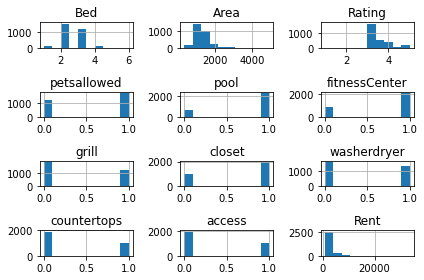

In [153]:
# plot the shape of variables that are numerical
import matplotlib.pyplot as plt

final.hist()
plt.tight_layout();

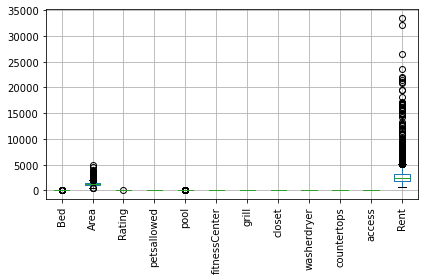

In [154]:
import seaborn as sns
final.boxplot()
plt.xticks(rotation=90)
plt.tight_layout();


In [155]:
#outlier
cols=["Area","Rent"]
for feat in cols:
    q1 = final[feat].quantile(0.25)
    q3 = final[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = final[feat][final[feat] < lower_fence].count()
    upper_count = final[feat][final[feat] > upper_fence].count()
    final.loc[final[feat]>=upper_fence,feat]=upper_fence
    final.loc[final[feat]<=lower_fence,feat]=lower_fence
    if lower_count > 0 or upper_count > 0:
        print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')
        

Area outliers = 161: lower_fence: 481.0, upper_fence: 2073.0, lower_count: 3, upper_count: 158
Rent outliers = 213: lower_fence: -240.0, upper_fence: 5068.0, lower_count: 0, upper_count: 213


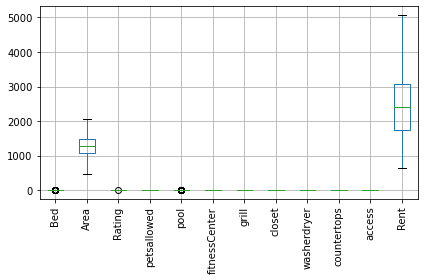

In [156]:
import seaborn as sns
final.boxplot()
plt.xticks(rotation=90)
plt.tight_layout();

<AxesSubplot:>

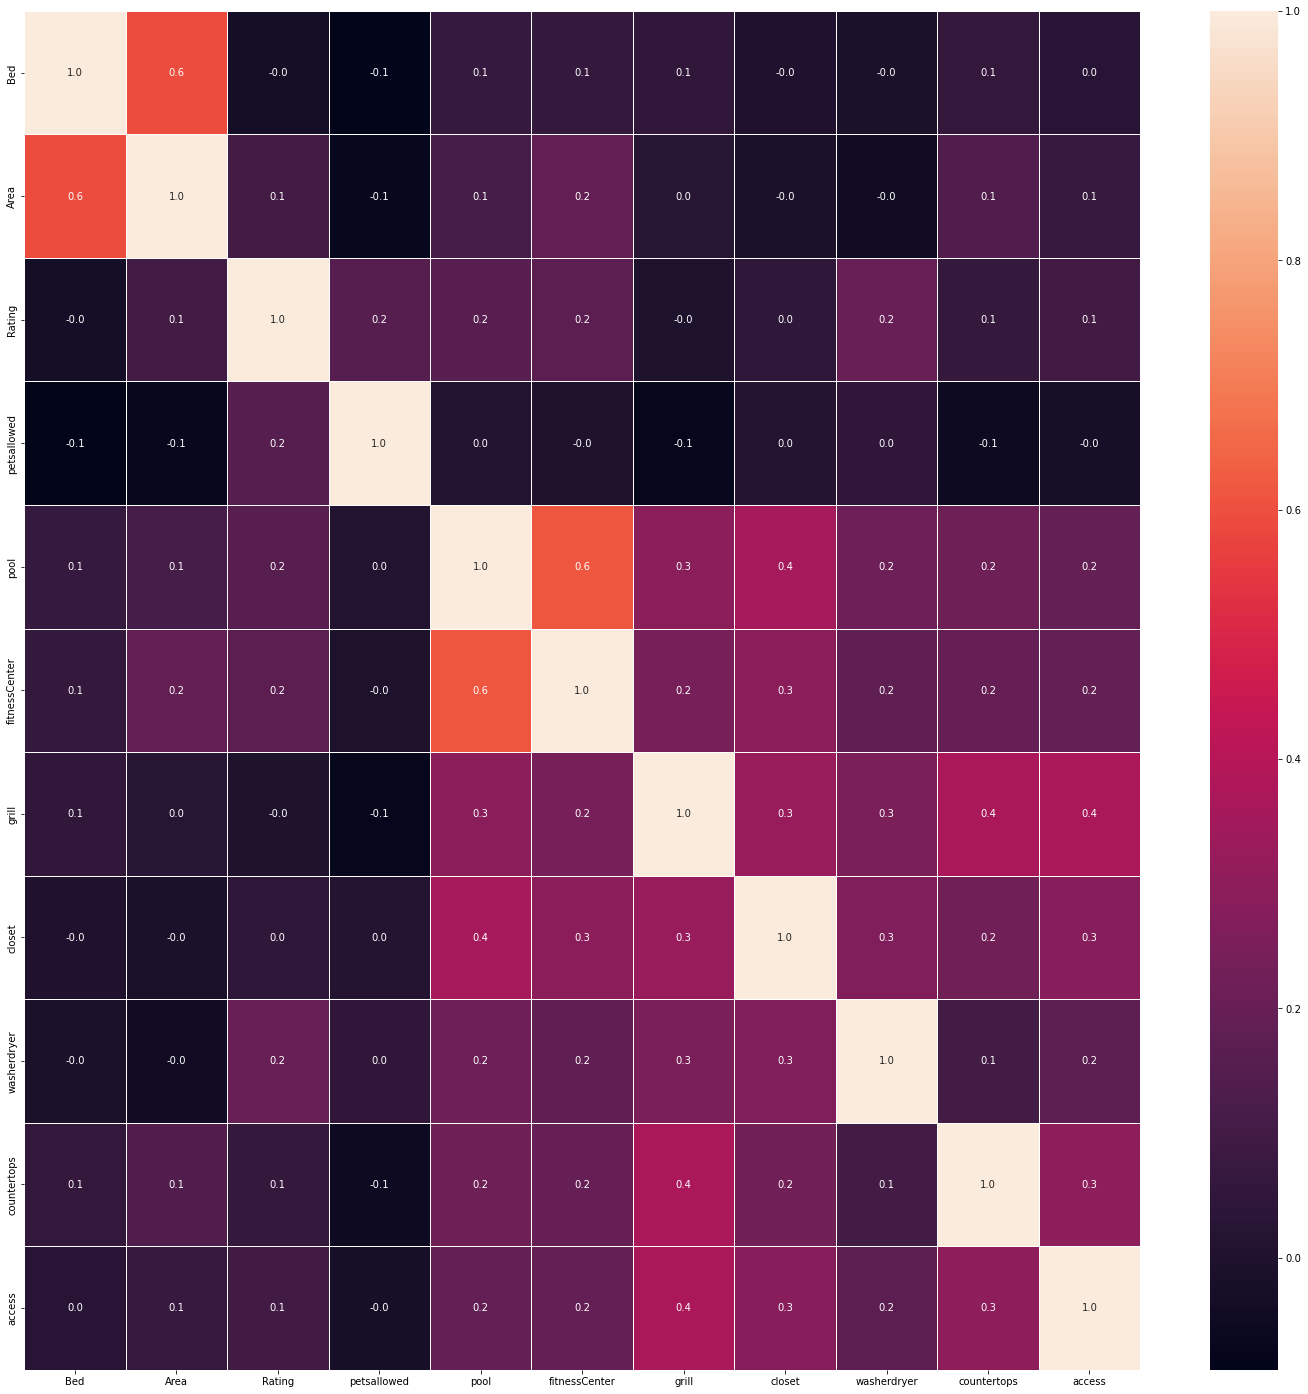

In [157]:
data = final.drop('Rent', axis=1)
corr = data.corr()

#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [159]:
final.to_csv("Rentpredictionpreprocesseddata.csv")
final.to_excel('Rentpredictionpreprocesseddata.xlsx', index = False)